# Practical: Advanced Structure Manipulation and Interface
In this practical, we will explore some advanced structure manipulation using `pymatgen`.

We will cover following:
- Creating a supercell
- Use `pymatgen`'s `transformation` and `transmuter` to manipulate structure
- Dealing with disordered structure
- Creating a Wulff shape
- Creating a surface slab

In [123]:
from mp_api.client import MPRester

MP_API_KEY = "api-key"

## Supercell
You can create a supercell using `pymatgen.core.Structure`'s `make_supercell()` method. This method takes a scaling matrix as an argument. The scaling matrix is a $3\times3$ matrix that defines the size of the supercell. For example, the scaling matrix `[[2, 0, 0], [0, 2, 0], [0, 0, 2]]` will create a supercell that is twice as large in each direction. You can use a scaling vector or a scaling factor as well. For example, `2` is equivalent to `[[2, 0, 0], [0, 2, 0], [0, 0, 2]]`.

In [80]:
from pymatgen.core import Structure
Si_unitcell = Structure.from_id(id_="mp-149",api_key=MP_API_KEY)
Si_unitcell.to(filename="Si_unitcell.cif")

Si_supercell = Si_unitcell.make_supercell([2,2,2], in_place=False)

print(f"Si unitcell has {len(Si_unitcell.sites)} sites")
print(f"Si supercell has {len(Si_supercell.sites)} sites")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Si unitcell has 2 sites
Si supercell has 16 sites


## Transformations

You can apply transformations provided by `pymatgen.transformations` module. For example, you can apply a `DeformStructureTransformation` to deform a structure. You can also apply a `StrainTransformation` to apply a strain to a structure. You can also apply a `RotationTransformation` to rotate a structure. You can also apply a `SupercellTransformation` to create a supercell.

In this part we will use `OrderDisorderedStructureTransformation` to create a ordered structure from an disordered structure.

In [81]:
LiFePO4_structure = Structure.from_id(id_="mp-19017",api_key=MP_API_KEY)
LiFePO4_structure.to(fmt="cif", filename="LiFePO4.cif")
LiFePO4_structure.add_oxidation_state_by_element({"Li":1,"Fe":2,"P":5,"O":-2})

print(LiFePO4_structure)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Full Formula (Li4 Fe4 P4 O16)
Reduced Formula: LiFePO4
abc   :  10.236196   5.970755   4.654917
angles:  90.000021  90.000000  90.000000
pbc   :       True       True       True
Sites (28)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Li+   0         0         0            0
  1  Li+   0.5       0.5       0.5          0
  2  Li+   0.5       0         0.5          0
  3  Li+   0         0.5       0            0
  4  Fe2+  0.781151  0.25      0.529866     3.645
  5  Fe2+  0.718849  0.75      0.029868     3.645
  6  Fe2+  0.281151  0.25      0.970133     3.645
  7  Fe2+  0.218849  0.75      0.470133     3.645
  8  P5+   0.093866  0.25      0.418623     0.009
  9  P5+   0.406134  0.75      0.918624     0.009
 10  P5+   0.593866  0.25      0.081375     0.009
 11  P5+   0.906134  0.75      0.581376     0.009
 12  O2-   0.094231  0.25      0.744787     0.029
 13  O2-   0.834155  0.545558  0.713735     0.073
 14  O2-   0.834155  0.9544

In [82]:
from pymatgen.transformations.standard_transformations import OrderDisorderedStructureTransformation, SubstitutionTransformation, AutoOxiStateDecorationTransformation

transformation = SubstitutionTransformation({"Li+":{"Li+":0.5}})
transformation.apply_transformation(LiFePO4_structure).to(fmt="cif", filename="LiFePO4_substituted.cif")

"# generated using pymatgen\ndata_LiFe2(PO4)2\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   10.23619605\n_cell_length_b   5.97075510\n_cell_length_c   4.65491719\n_cell_angle_alpha   90.00002115\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   LiFe2(PO4)2\n_chemical_formula_sum   'Li2 Fe4 P4 O16'\n_cell_volume   284.49838986\n_cell_formula_units_Z   2\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_type_symbol\n _atom_type_oxidation_number\n  Li+  1.0\n  Fe2+  2.0\n  P5+  5.0\n  O2-  -2.0\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Li+  Li0  1  0.00000000  0.00000000  0.00000000  0.5\n  Li+  Li1  1  0.50000000  0.50000000  0.50000000  0.5\n  Li+  Li2  1  0.50000000  0.00000000  0.50000000  0.5\n  Li+  Li3  1  0.000000

## Transmuter
You can use `Transmuter` to apply a list of transformations to a structure (or a list of structures). 

In [83]:
from pymatgen.alchemy.transmuters import StandardTransmuter

transmuter = StandardTransmuter.from_structures([LiFePO4_structure])
transmuter.append_transformation(AutoOxiStateDecorationTransformation())
transmuter.append_transformation(SubstitutionTransformation({"Li+":{"Li+":0.5}}))
transmuter.append_transformation(OrderDisorderedStructureTransformation(), extend_collection=500)
print ("Total ordering:", len(transmuter))


Total ordering: 6


/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/pymatgen/core/structure.py:1476: UserWarning:

Structure charge (0) is set to be not equal to the sum of oxidation states (-2.0). Use Structure.unset_charge() to reset the charge to None.



## Filter
You can use `filters` to remove structures from this list. For example, you can use `RemoveDuplicatesFilter` to remove structures that are symetrically equivalent. 

In [84]:
from pymatgen.alchemy.filters import RemoveDuplicatesFilter

transmuter.apply_filter(RemoveDuplicatesFilter())
print(f"Total unique orderings: {len(transmuter)}")


Total unique orderings: 3


## Surface Energy and Wulff Shape
We will construct a Wulff shape for a given surface energy. We will use `pymatgen.analysis.wulff` module to construct the Wulff shape. The surface energies will be obtained from the Materials Project database.

In [85]:

# Initialize the MP Rester
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.surface_properties.search(
        material_ids=["mp-149", "mp-13"],
    )

# dump results to a json file
import json
with open('materials_data.json', 'w') as f:
    json.dump([doc.dict() for doc in docs], f, indent=4)

Retrieving SurfacePropDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

In [86]:
for doc in docs:
    print(doc.structure.composition.reduced_formula)
    for surface in doc.surfaces:
        print(f"Miller index {surface.miller_index} {surface.surface_energy}")
        surface_structure = Structure.from_str(surface.structure, fmt="cif")
        surface_structure.to(fmt="cif", filename=f"surface_{doc.structure.composition.reduced_formula}_{surface.miller_index}.cif")

Si
Miller index [1, 0, 0] 1.284268152730187
Miller index [1, 0, 0] 2.131326047257664
Miller index [2, 1, 0] 1.4866929977468957
Miller index [1, 1, 0] 1.5067182040304126
Miller index [1, 1, 0] 1.7594558903717257
Miller index [2, 2, 1] 1.6457843320763543
Miller index [2, 1, 1] 1.6660736192125039
Miller index [1, 1, 1] 1.3033220143041493
Miller index [1, 1, 1] 1.5722243606882504
Miller index [3, 2, 0] 1.449812188585454
Miller index [3, 1, 0] 1.490250833954849
Miller index [3, 3, 1] 1.5815966627478346
Miller index [3, 2, 1] 1.5169342558850045
Miller index [3, 2, 2] 1.3929371052941404
Miller index [3, 1, 1] 1.5214641266582059
Miller index [3, 3, 2] 1.6087120239639487
Fe
Miller index [1, 0, 0] 2.4992854289027573
Miller index [1, 1, 0] 2.4470929045310226
Miller index [2, 1, 0] 2.566556849458603
Miller index [1, 1, 1] 2.730020673863697
Miller index [2, 2, 1] 2.6553975674110712
Miller index [2, 1, 1] 2.60865275302826
Miller index [3, 2, 0] 2.5551968169555015
Miller index [3, 3, 2] 2.67634558408

/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning:

Issues encountered while parsing CIF: 16 fractional coordinates rounded to ideal values to avoid issues with finite precision.

/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning:

Issues encountered while parsing CIF: 1 fractional coordinates rounded to ideal values to avoid issues with finite precision.

/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning:

Issues encountered while parsing CIF: 24 fractional coordinates rounded to ideal values to avoid issues with finite precision.

/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning:

Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.



Si: shape factor: 1.169, anisotropy: 0.016, weighted surface energy: 1.437 J/m^2
Fe: shape factor: 4.942, anisotropy: 0.030, weighted surface energy: 2.527 J/m^2


/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/pymatgen/analysis/wulff.py:313: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



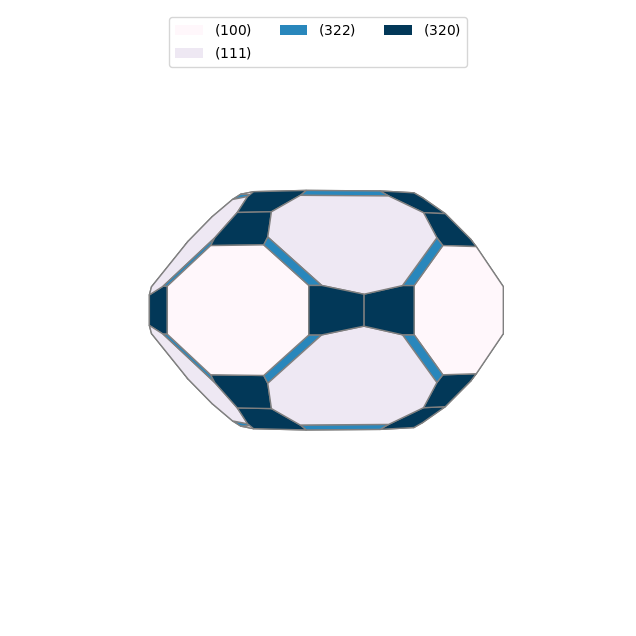

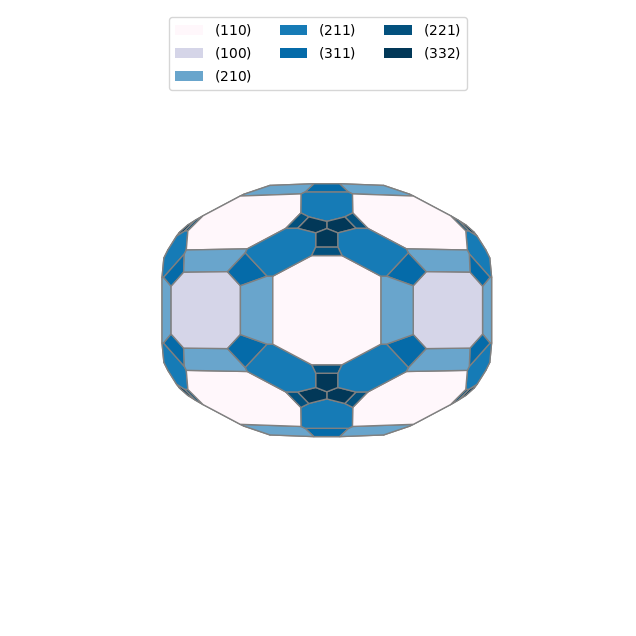

In [87]:
from pymatgen.analysis.wulff import WulffShape

# Create a Wulff shape from the surface energies
for doc in docs:
    wulffshape = WulffShape(
        lattice=doc.structure.lattice,
        miller_list=[surface.miller_index for surface in doc.surfaces],
        e_surf_list=[surface.surface_energy for surface in doc.surfaces],
    )
    print(f"{doc.structure.composition.reduced_formula}: shape factor: {wulffshape.shape_factor:.3f}, anisotropy: {wulffshape.anisotropy:.3f}, weighted surface energy: {wulffshape.weighted_surface_energy:.3f} J/m^2")
    # Plot the Wulff shape
    wulffshape.show()

You can also use `Wulffpack` to construct a Wulff shape. But you need to install this package separately.

In [122]:
!pip install wulffpack


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


/Users/zeyudeng/apps/matsci/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning:

dict interface (SpglibDataset['rotations']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead



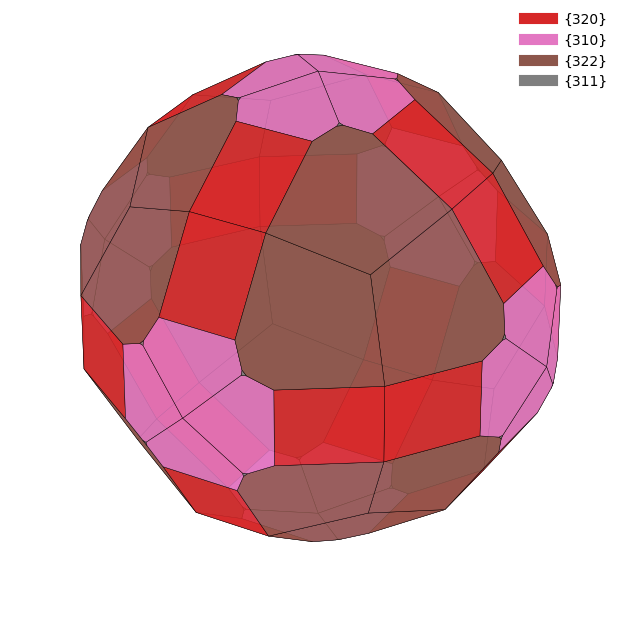

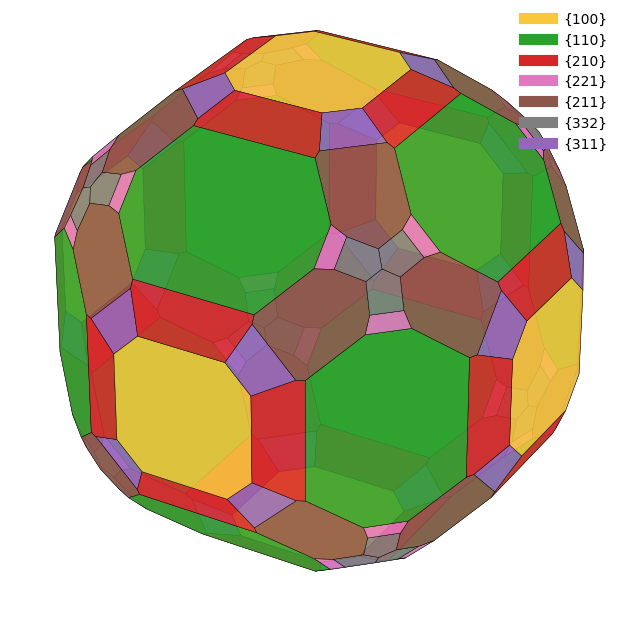

In [ ]:
from wulffpack import SingleCrystal

for doc in docs:
    surface_energies = {tuple(surface.miller_index): surface.surface_energy for surface in doc.surfaces}
    particle = SingleCrystal(surface_energies)
    particle.view()

## Slab Model
We will use `pymatgen.core.surface.SlabGenerator` to create a slab model (`pymatgen.core.surface.Slab`), which is the key to compute surface properties. We will check if the Taskers condition is satisfied for a given slab by checking their polarity. Only symmetric slabs will be generated. Fe-O bonds will be cut in the slab model.

In [88]:
from pymatgen.core.surface import SlabGenerator

LiFePO4_structure.add_oxidation_state_by_element({"Fe": 2, "Li": 1, "P": 5, "O": -2})

slabgen = SlabGenerator(initial_structure=LiFePO4_structure, 
                        miller_index=(1, 0, 0), 
                        min_slab_size=2, 
                        min_vacuum_size=10)

all_slabs = slabgen.get_slabs(bonds={("P", "O"): 2})
print(f"For the (001) slab of LiFePO4, there are {len(all_slabs)} terminations.")

for slab in all_slabs:
    print(f"Is polar? {slab.is_polar()}, is symmetric? {slab.is_symmetric()}")

For the (001) slab of LiFePO4, there are 2 terminations.
Is polar? True, is symmetric? False
Is polar? False, is symmetric? True


In the last example, we will generate lots of slabs of different Miller indices (up to 2) and check if they satisfy the Taskers condition. In this example, we will use `pymatgen.core.surface.generate_all_slabs` to generate all possible slabs for a given structure. Fe-O bonds will be cut in the slab model.

In [90]:
from itertools import product
from pymatgen.core.surface import generate_all_slabs
# Generate all possible miller indices
miller_indices = list(product(range(0,4), repeat=3))[1:] # Skip (0, 0, 0)
    
all_slabs = generate_all_slabs(structure=LiFePO4_structure,
                               max_index=2,
                               min_slab_size=10,
                               min_vacuum_size=10,
                               bonds={("P", "O"): 3})
    
for slab in all_slabs:
    print(f"{slab.miller_index} slabs of LiFePO4")
    print(f"Is polar? {slab.is_polar()}, is symmetric? {slab.is_symmetric()}")
    if slab.is_symmetric() and not slab.is_polar():
        print(f"Is polar? {slab.is_polar()}, is symmetric? {slab.is_symmetric()}")
        slab.to(fmt="cif", filename=f"LiFePO4_{slab.miller_index}.cif")
    

(1, 0, 1) slabs of LiFePO4
Is polar? True, is symmetric? False
(1, 0, 0) slabs of LiFePO4
Is polar? True, is symmetric? False
(1, 0, 0) slabs of LiFePO4
Is polar? False, is symmetric? True
Is polar? False, is symmetric? True
(0, 1, 0) slabs of LiFePO4
Is polar? True, is symmetric? False
(2, 1, 0) slabs of LiFePO4
Is polar? True, is symmetric? False


## Heterogenous Interface
In the last example, we will create a heterogenous interface between $\rm{LiFePO_4}$ and $\rm{Si}$. We will use `SubstrateAnalyzer` to analyze the strain between the interface using the ZSL method, and then we will use `CoherentInterfaceBuilder` to build the interface.

In [112]:
from pymatgen.analysis.interfaces.substrate_analyzer import SubstrateAnalyzer

sub_analyzer = SubstrateAnalyzer(max_area_ratio_tol=0.09,
                                 max_area=800,
                                 max_length_tol=0.03,
                                 max_angle_tol=0.01,
                                 bidirectional=False
                                )

matches = list(sub_analyzer.calculate(film=LiFePO4_structure,
                                      substrate=Si_supercell,
                                      film_millers=[(1,0,0)],
                                      substrate_millers=[(1,1,1)]))
print(f"Found {len(matches)} matches")
for match in matches:
    print(f"Match area: {match.match_area:.2f}, strain {match.von_mises_strain:.3f}")

Found 18 matches
Match area: 555.87, strain 0.012
Match area: 555.87, strain 0.012
Match area: 555.87, strain 0.012
Match area: 555.87, strain 0.012
Match area: 555.87, strain 0.012
Match area: 555.87, strain 0.012
Match area: 722.63, strain 0.024
Match area: 722.63, strain 0.024
Match area: 722.63, strain 0.024
Match area: 722.63, strain 0.024
Match area: 722.63, strain 0.024
Match area: 722.63, strain 0.024
Match area: 778.21, strain 0.026
Match area: 778.21, strain 0.026
Match area: 778.21, strain 0.026
Match area: 778.21, strain 0.026
Match area: 778.21, strain 0.026
Match area: 778.21, strain 0.026


The matching algorithm is Zur and McGill, Journal of Applied Physics 55 (1984), 378 ; doi: 10.1063/1.333084. Coherent interface builder can analyze the termination of the interface and build the interface.

In [107]:
from pymatgen.analysis.interfaces.coherent_interfaces import CoherentInterfaceBuilder
from pymatgen.analysis.interfaces.zsl import ZSLGenerator


zsl = ZSLGenerator(max_area=800)
cib = CoherentInterfaceBuilder(film_structure=LiFePO4_structure,
                               substrate_structure=Si_unitcell,
                               film_miller=(1,0,0),
                               substrate_miller=(1,1,1),
                               zslgen=zsl)

print(f"Terminations: {cib.terminations}")


Terminations: [('Li_Pmmm_2', 'Si_R-3m_1'), ('O2_Pmmm_1', 'Si_R-3m_1'), ('PO_Pmm2_2', 'Si_R-3m_1'), ('O2_Pmmm_2', 'Si_R-3m_1'), ('Fe_Pmmm_1', 'Si_R-3m_1')]


Then we can build the interface by giving the termination.

In [109]:
interfaces=list(cib.get_interfaces(termination= ('O2_Pmmm_1', 'Si_R-3m_1'),
                                   film_thickness=2,
                                   substrate_thickness=5))
len(interfaces)
interface = interfaces[0]

interface.to(fmt="cif", filename="LiFePO4_Si_interface.cif")

"# generated using pymatgen\ndata_Li4Fe4Si11(PO4)4\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   7.69855882\n_cell_length_b   36.71977908\n_cell_length_c   56.89399175\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   86.99552753\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Li4Fe4Si11(PO4)4\n_chemical_formula_sum   'Li80 Fe80 Si220 P80 O320'\n_cell_volume   16061.21981452\n_cell_formula_units_Z   20\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Li+  Li0  1  0.00000000  0.00000000  0.60914066  1\n  Li+  Li1  1  0.20000000  0.20000000  0.60914066  1\n  Li+  Li2  1  0.60000000  0.10000000  0.60914066  1\n  Li+  Li3  1  0.00000000  0.50000000  0.60914066  1\n  Li+  Li4  1  0.40000000  0.40000000  0.60914066  1\n  Li